<a href="https://colab.research.google.com/github/calcoach/covidStatistics/blob/master/Statistics_covid2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadisticas Covid19 Colombia


#Instalar sodapy


In [1]:
!pip install sodapy

#Obtener JSON con la data

Llama a la api de datos.gov con el json de datos de casos positivos covid19 



In [2]:

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
dataset = "gt2j-8ykr"
count = client.get(dataset,select ="COUNT(*)")
count = count.pop()
limite = count['COUNT']
print('Limite: ' + str(limite))

results = client.get(dataset, limit = limite)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

Limite: 154277


Obtiene un sumario de las columnas

In [ ]:
#results_df.count()
results_df.describe()

,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte
count,150445,150445,150445,150445,150445,150445,150445,150445,150445,150445,951,150445,146987,63451,150445,63452,150445,875,80148,2238,5442
unique,150445,130,732,691,37,6,109,4,3,6,46,138,126,120,126,2,36,39,6,85,114
top,82119,2020-06-26T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,30,M,En estudio,Leve,ESPAÑA,Asintomático,2020-07-10T00:00:00.000,2020-07-06T00:00:00.000,2020-07-10T00:00:00.000,PCR,11,724,Otro,Por definir,2020-07-03T00:00:00.000
freq,1,4656,49644,49644,49644,72479,4171,80807,133633,115126,265,19670,6373,2430,6803,31817,49644,260,70503,555,147


In [3]:
 #condition = results_df[results_df['estado'] == "Leve"]
 #print(condition.count)
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

total = len(results_df.index)
estados = pd.unique(results_df['estado'])

for estado in estados:
  #print(estado + ": " + str((results_df.estado == estado).sum())  )
  num = (results_df.estado == estado).sum()
  per = truncate((num * 100)/total,2)
  print('{}: {} {}%'.format(estado,num, per))

print("Total: "+ str(total))

print('\n')

print("Norte de Santander: "+str((results_df.departamento =='Norte de Santander').sum()))
print("Barranquilla: "+str((results_df.departamento =='Barranquilla D.E.').sum()))
print("Atlantico: "+str((results_df.departamento == "Atlantico").sum()))
 



Leve: 117976 76.47%
Asintomático: 20282 13.14%
Fallecido: 5396 3.49%
Moderado: 9308 6.03%
Grave: 973 0.63%
N/A: 342 0.22%
Total: 154277


Norte de Santander: 601
Barranquilla: 19158
Atlantico: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


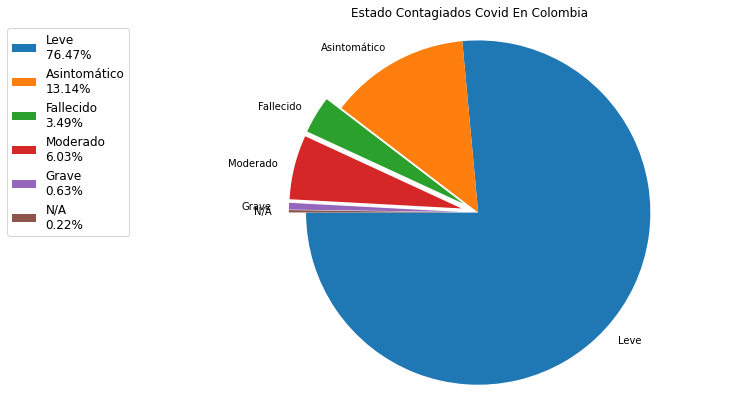

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def func(label, pct, allvalues): 
    absolute = pct * 100/np.sum(allvalues)
    return "{}\n{}%".format(label, truncate(absolute,2)) 

explode = (0.0, 0.0, 0.1, 0.1, 0.1, 0.1) 
labels = pd.unique(results_df['estado'])
labels_with_percentage = []

estados = []

for label in labels:
  sum = (results_df.estado == label).sum()
  estados.append(sum)

for (label, estado) in zip(labels,estados):
    labels_with_percentage.append(func(label, estado, estados))

fig, ax = plt.subplots(figsize = (10, 7)) 

ax.pie(estados, explode=explode, labels=labels,  startangle=180)

plt.axis('equal') # Try commenting this out.
plt.title('Estado Contagiados Covid En Colombia')
plt.legend(labels_with_percentage, loc='left center', bbox_to_anchor=(-0.1, 1.),
              fontsize=12)

plt.show()

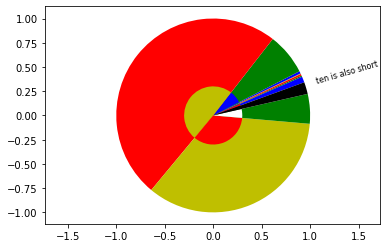

In [69]:
import pylab
import matplotlib.pyplot as plt
import math

fig, ax = plt.subplots()

labels= [
"one",
"two",
"three made up sentences",
"four is also there",
"five becomes a sentence",
"six it is",
"seven long",
"eight long sent",
"nine, as bla bel mo",
"ten is also short"]

l = ax.pie([1,0.2, 0.3,0.1,0.4,7,50,35,5,2],
labels=[""] * len(labels),
colors=("b","g","r","y", "b","g","r","y","g","black"),
startangle=20,
radius=1,
frame=True,   # Plot axes frame with the chart if true.
labeldistance=1.1) #returns a list of matplotlib.patches.Wedge objects

l2 = ax.pie([1,0.2, 0.3,0.1,0.4,7,50,35,5,2],#[0, 0.1, 0, 0.1,0,0.1,0,0.1,0,0.1],
colors=("r","g","b","w", "g","b","y","r","w","black"),
startangle=20,
radius=1-0.7,
frame=True)   # Plot axes frame with the chart if true.

for label, t in zip(labels, l[1]):
 x, y = t.get_position()
 angle = int(math.degrees(math.atan2(y, x)))
 ha = "left"
 va = "bottom"

if angle > 90:
 angle -= 180

if angle < 0:
 va = "top"

if -45 <= angle <= 0:
 ha = "right"
 va = "bottom"

plt.annotate(label, xy=(x,y), rotation=angle, ha=ha, va=va, size=8)

ax.axis("equal")
plt.show()